 **Analysis of Python Developer Survey 2017 by JetBrains**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set(style='darkgrid')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('pythondevsurvey2017_raw_data.csv')
df.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


We can see from the countplot that **Unites States of America has highest number of Python Developers**, followed by India, China and United Kingdom

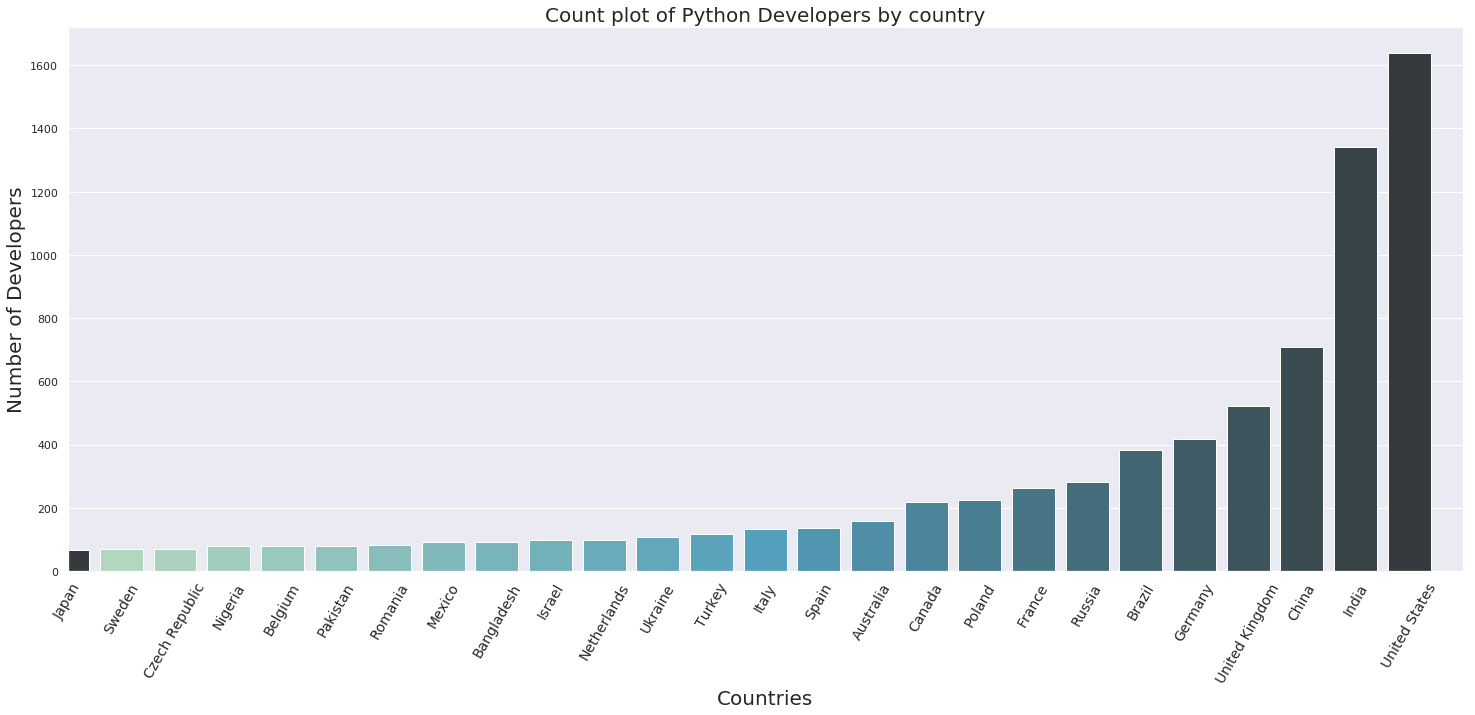

In [3]:
plt.figure(figsize=(25,10))
sns.countplot(x='What country do you live in?', data=df, order=df['What country do you live in?'].value_counts().index, 
              palette=sns.color_palette("GnBu_d", 25))
plt.title("Count plot of Python Developers by country", fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Number of Developers', fontsize=20)
plt.xlim(25,-1)
plt.xticks(rotation=60, fontsize=14)
plt.show()

Most python developers use JavaScript as other language

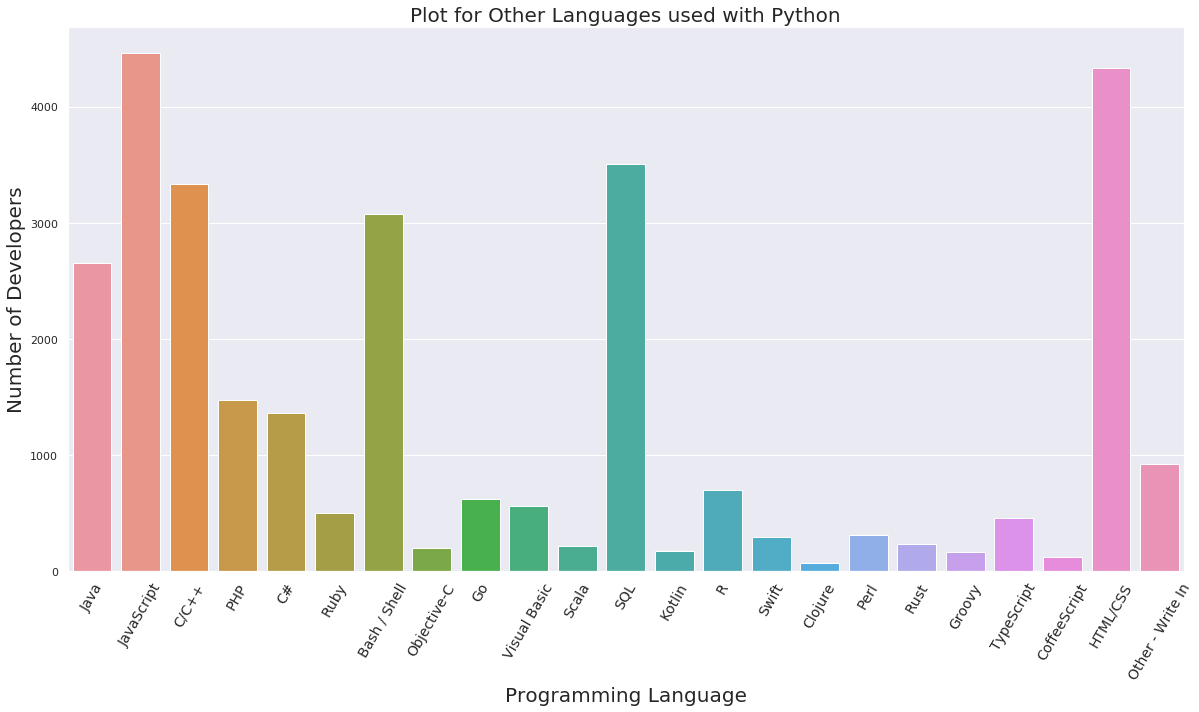

In [4]:
lang_counts = df.iloc[:,2:25].count()

lang_labels = list(map(lambda x: x.split(':')[0], df.columns[2:25]))

plt.figure(figsize=(20,10))
sns.barplot(y=lang_counts ,x=lang_labels )
plt.xlabel("Programming Language", fontsize=20)
plt.ylabel('Number of Developers',fontsize=20)
plt.xticks(rotation=60,fontsize=14)
plt.title('Plot for Other Languages used with Python',fontsize=20)
plt.show()

Python is **mostly used for Data Analysis**, followed by Web Development

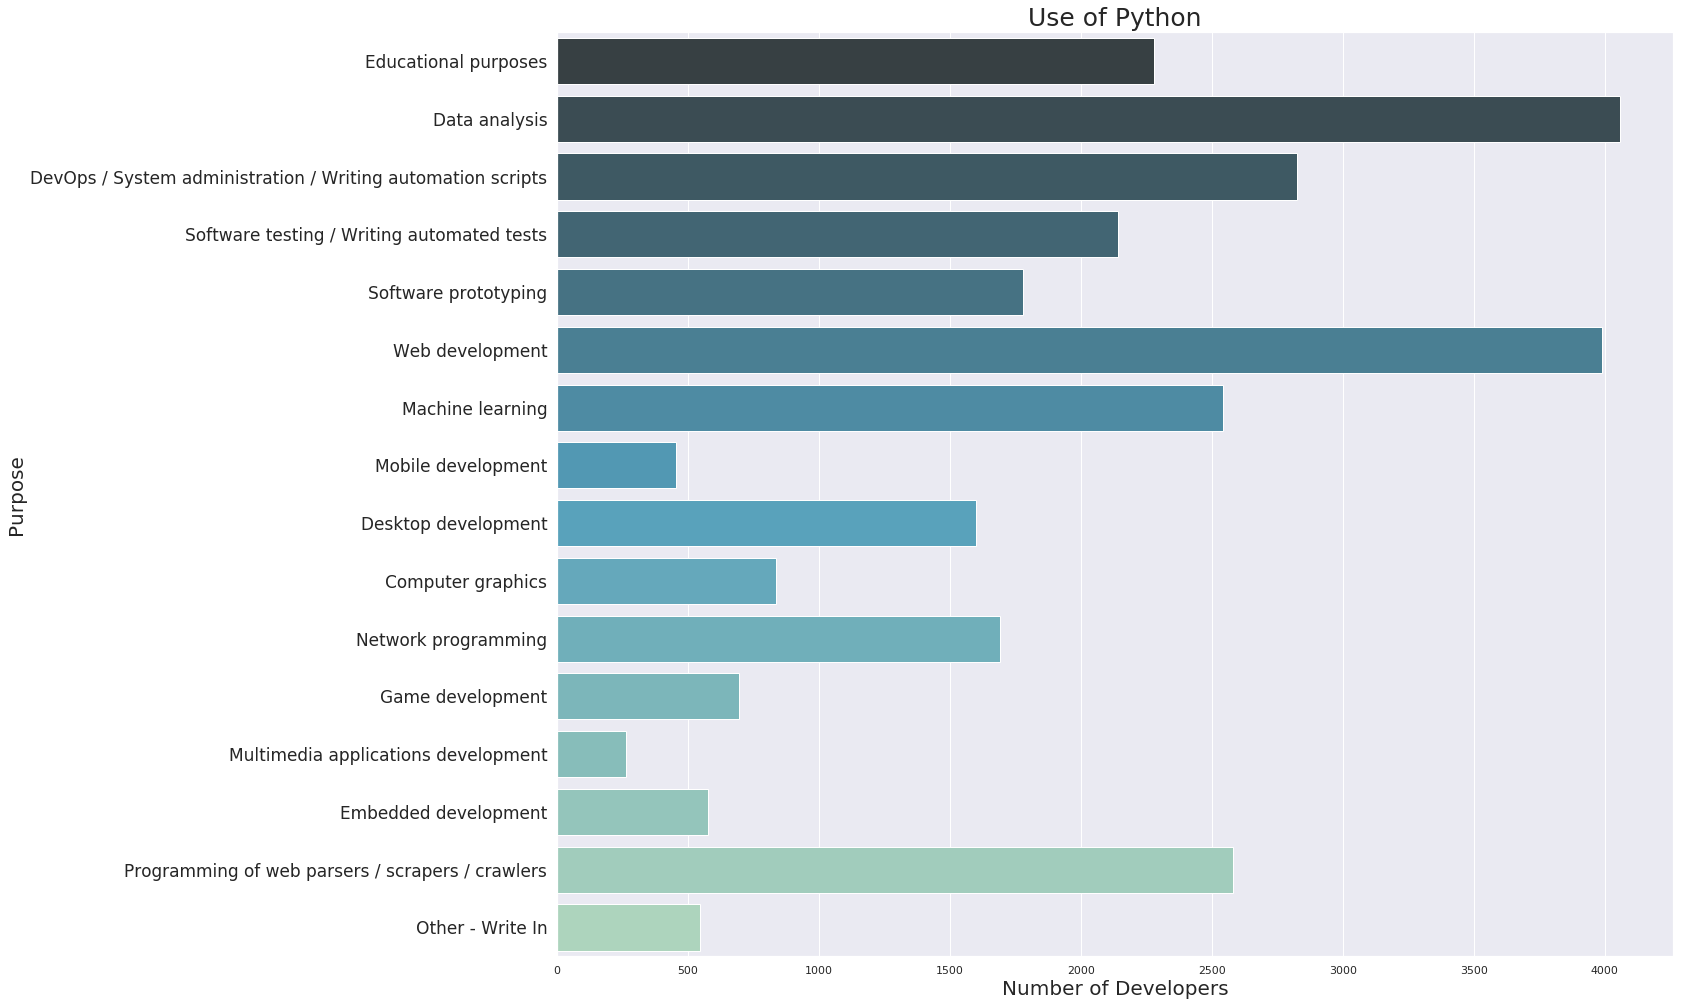

In [5]:
use_counts = df.iloc[:,25:41].count()
use_labels = list(map(lambda x: x.split(':')[0], df.columns[25:41]))

plt.figure(figsize=(20,17))
sns.barplot(y=use_labels, x=use_counts, palette="GnBu_d")
plt.ylabel("Purpose", fontsize=20)
plt.xlabel('Number of Developers',fontsize=20)
plt.yticks(fontsize=17)
plt.title('Use of Python',fontsize=25)

plt.show()


Python 3 has significantly more users than Python 2

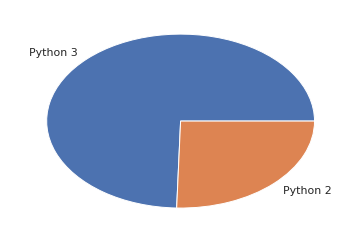

In [6]:
py3_users = df.iloc[:,42][df.iloc[:,42]=='Python 3'].count()
py2_users = df.iloc[:,42][df.iloc[:,42]=='Python 2'].count()

plt.pie(x=[py3_users,py2_users], labels=['Python 3', 'Python 2'])
plt.show()

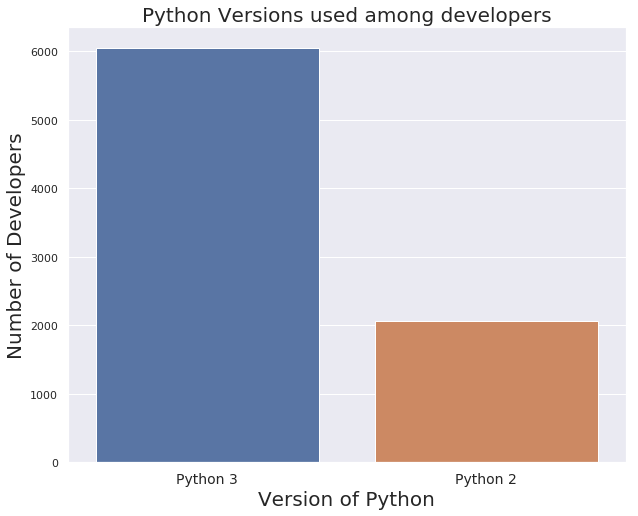

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df.iloc[:,42])
plt.xlabel("Version of Python", fontsize=20)
plt.ylabel('Number of Developers',fontsize=20)
plt.title('Python Versions used among developers',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

Pycharm is most used IDE for Python Devlopment, whereas Sublime is most used Text Editor

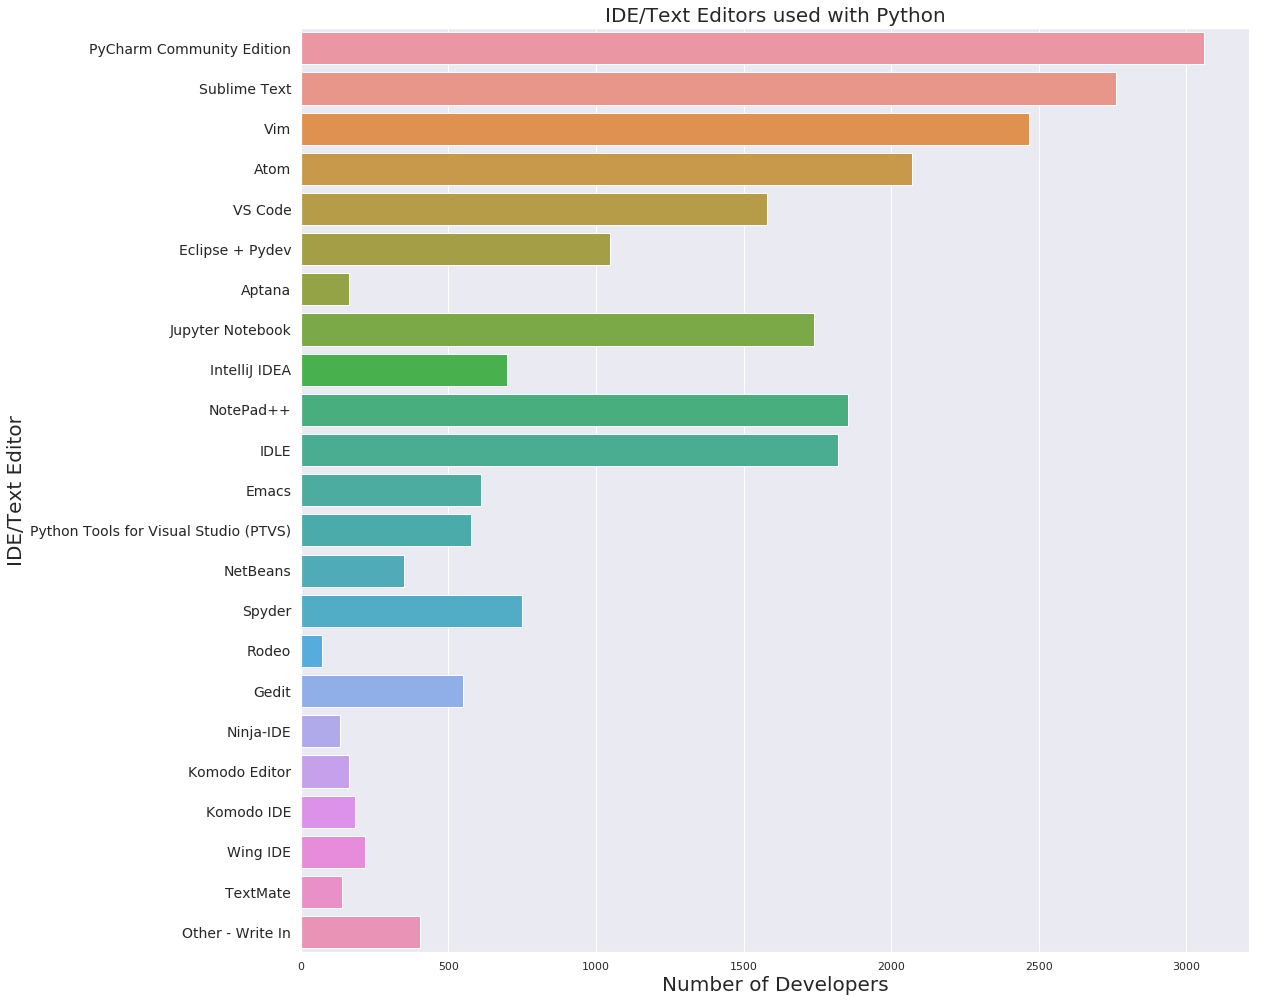

In [8]:
ide_counts = df.iloc[:,96:119].count()
ide_labels = list(map(lambda x: x.split(':')[0], df.columns[96:119]))

plt.figure(figsize=(17,17))
sns.barplot(y=ide_labels, x=ide_counts)
plt.ylabel("IDE/Text Editor", fontsize=20)
plt.xlabel('Number of Developers',fontsize=20)
plt.yticks(fontsize=14)
plt.title('IDE/Text Editors used with Python',fontsize=20)
plt.show()


Most python Developers lie in the range of 21-29, followed by 30-39

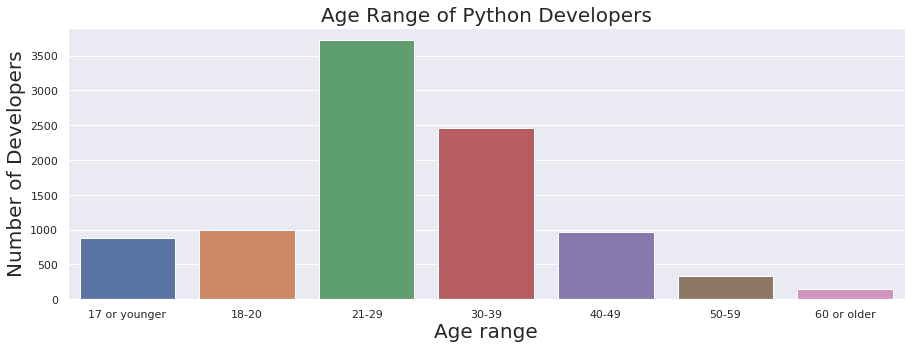

In [9]:
plt.figure(figsize=(15,5))
sns.countplot('Could you tell us your age range?', data=df, order=['17 or younger', '18-20', '21-29', '30-39', '40-49', '50-59', '60 or older'])
plt.xlabel("Age range", fontsize=20)
plt.ylabel('Number of Developers',fontsize=20)
plt.title('Age Range of Python Developers',fontsize=20)
plt.show()

In [10]:
lang = df.iloc[:,2:25]
lang.columns = list(x.split(':')[0] for x in lang.columns)
original_lang = lang.copy()

for col in lang.columns:
    lang[col].replace(col, 1, inplace=True)
    lang[col].fillna( 0, inplace=True)
lang.drop('Other - Write In', axis=1, inplace=True)    
lang.head()

,Java,JavaScript,C/C++,PHP,C#,Ruby,Bash / Shell,Objective-C,Go,Visual Basic,...,Kotlin,R,Swift,Clojure,Perl,Rust,Groovy,TypeScript,CoffeeScript,HTML/CSS
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
lang_train, lang_test = train_test_split(lang, test_size=0.2)
clf = KMeans()
clf.fit(lang_train)
#print(clf.clusters_centers_)
confidence = clf.score(lang_test)
print(confidence)

-2346.4812045423605
